In [1]:
#Importing All Required Libraries.

!pip install pyforest
from pyforest import *
lazy_imports()

['import tensorflow as tf',
 'import xgboost as xgb',
 'import fastai',
 'from sklearn.decomposition import PCA',
 'from pyspark import SparkContext',
 'import plotly as py',
 'import re',
 'from sklearn.preprocessing import MinMaxScaler',
 'import random',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.model_selection import train_test_split',
 'import torch',
 'from sklearn.linear_model import ElasticNet',
 'import imutils',
 'import pydot',
 'import datetime as dt',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.manifold import TSNE',
 'import gensim',
 'import cv2',
 'import sklearn',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import skimage',
 'import dash',
 'from sklearn.model_selection import KFold',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.linear_model import ElasticNetCV',
 'import statsmodels.

In [2]:
#Loading Datasets

df1 = pd.read_csv("C:/Users/VISHNU/Desktop/dataset/Bangalore.csv")
print(df1.shape)
df1['City'] = 'Bangalore'
df2 = pd.read_csv("C:/Users/VISHNU/Desktop/dataset/Chennai.csv")
print(df2.shape)
df2['City'] = 'Chennai'
df3 = pd.read_csv("C:/Users/VISHNU/Desktop/dataset/Delhi.csv")
print(df3.shape)
df3['City'] = 'Delhi'
df4 = pd.read_csv("C:/Users/VISHNU/Desktop/dataset/Hyderabad.csv")
print(df4.shape)
df4['City'] = 'Hyderabad'
df5 = pd.read_csv("C:/Users/VISHNU/Desktop/dataset/Kolkata.csv")
print(df5.shape)
df5['City'] = 'Kolkota'
df6 = pd.read_csv("C:/Users/VISHNU/Desktop/dataset/Mumbai.csv")
print(df6.shape)
df6['City'] = 'Mumbai'

<IPython.core.display.Javascript object>

(6207, 40)


<IPython.core.display.Javascript object>

(5014, 40)


<IPython.core.display.Javascript object>

(4998, 40)


<IPython.core.display.Javascript object>

(2518, 40)


<IPython.core.display.Javascript object>

(6507, 40)


<IPython.core.display.Javascript object>

(7719, 40)


In [3]:
#Concatenating all datasets

dfs = [df1, df2, df3, df4, df5, df6]
df = pd.concat(dfs, ignore_index=True)
# df.to_csv('output.csv', index=False)



<IPython.core.display.Javascript object>

In [4]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore


In [5]:
print(df.shape)

(32963, 41)


In [6]:
#Info and checking for null set in dataset

#As it can be clealy observed while location is object rest all are of integer int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  Club

In [7]:
df.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [8]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,3.296300e+04,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,1.168672e+07,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


<IPython.core.display.Javascript object>

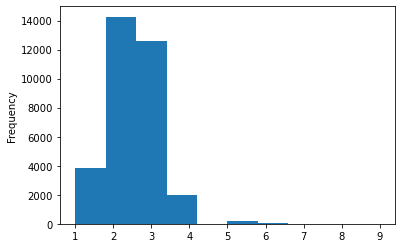

<IPython.core.display.Javascript object>

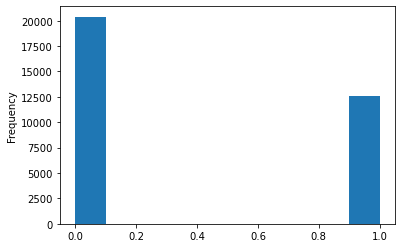

<IPython.core.display.Javascript object>

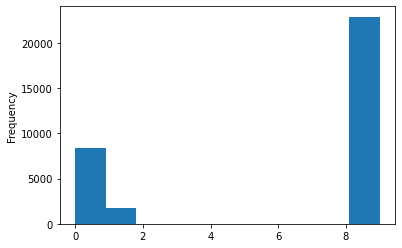

<IPython.core.display.Javascript object>

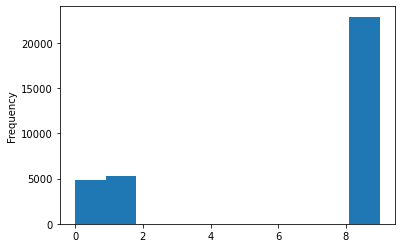

<IPython.core.display.Javascript object>

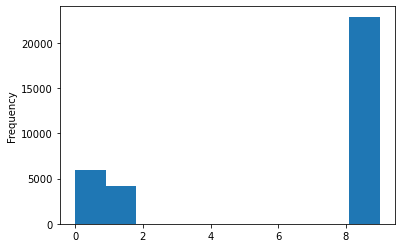

<IPython.core.display.Javascript object>

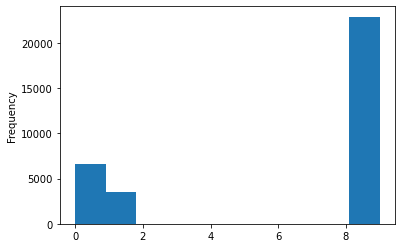

<IPython.core.display.Javascript object>

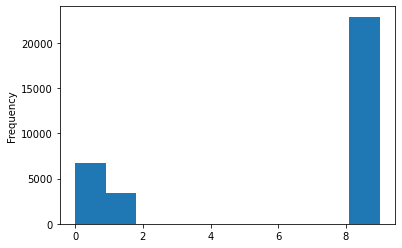

<IPython.core.display.Javascript object>

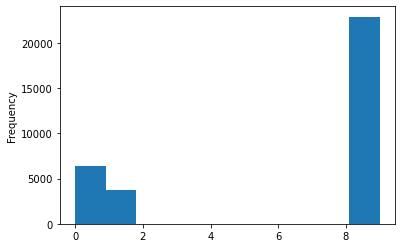

<IPython.core.display.Javascript object>

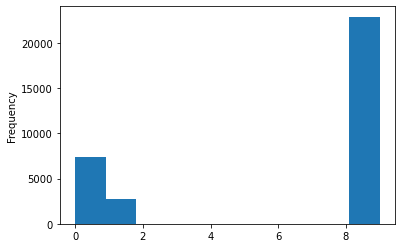

<IPython.core.display.Javascript object>

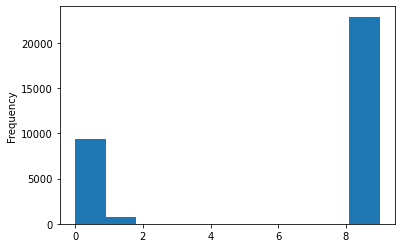

<IPython.core.display.Javascript object>

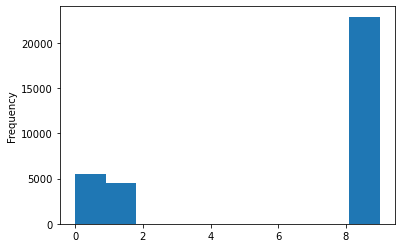

<IPython.core.display.Javascript object>

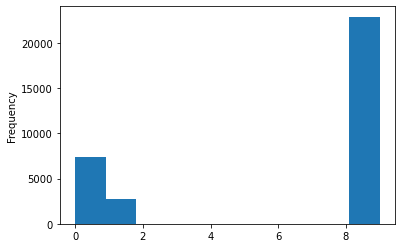

<IPython.core.display.Javascript object>

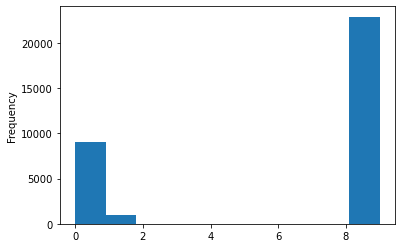

<IPython.core.display.Javascript object>

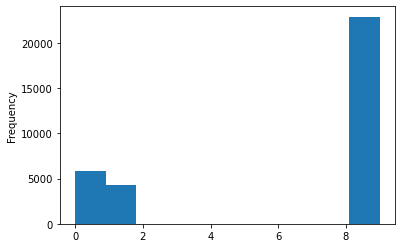

<IPython.core.display.Javascript object>

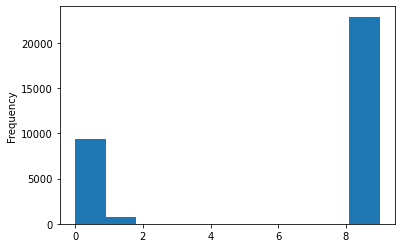

<IPython.core.display.Javascript object>

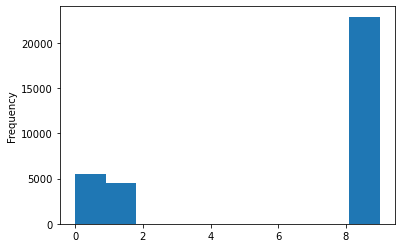

<IPython.core.display.Javascript object>

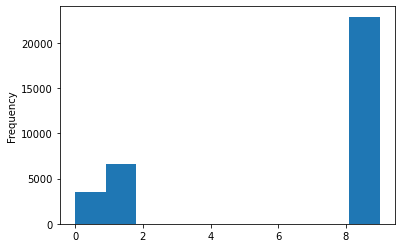

<IPython.core.display.Javascript object>

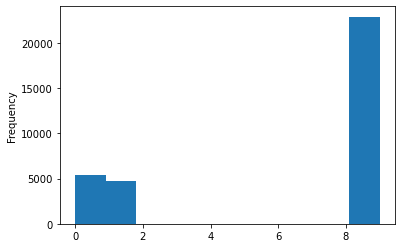

<IPython.core.display.Javascript object>

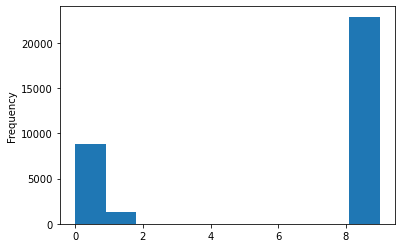

<IPython.core.display.Javascript object>

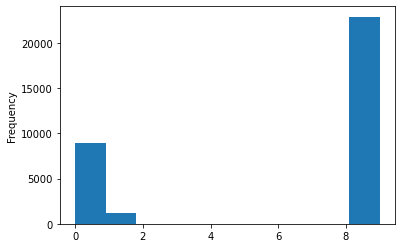

<IPython.core.display.Javascript object>

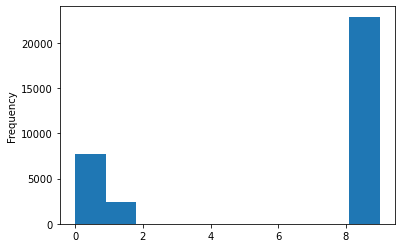

<IPython.core.display.Javascript object>

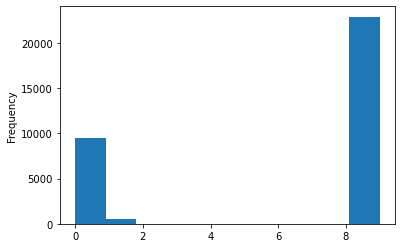

<IPython.core.display.Javascript object>

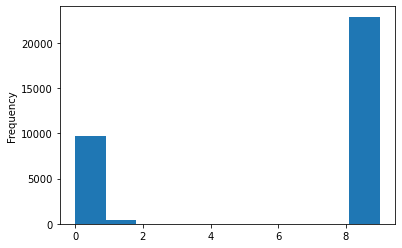

<IPython.core.display.Javascript object>

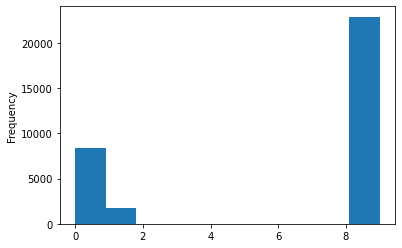

<IPython.core.display.Javascript object>

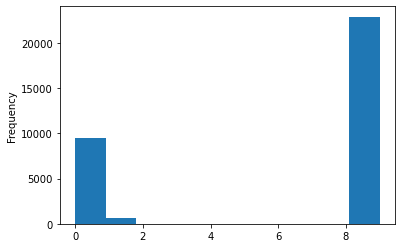

<IPython.core.display.Javascript object>

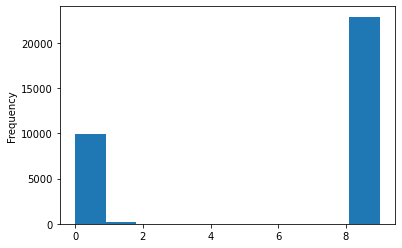

<IPython.core.display.Javascript object>

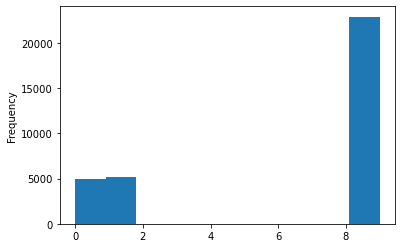

<IPython.core.display.Javascript object>

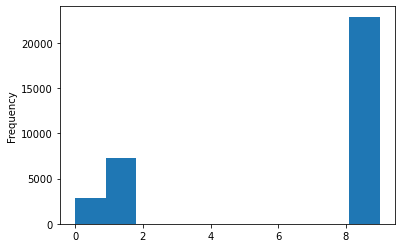

<IPython.core.display.Javascript object>

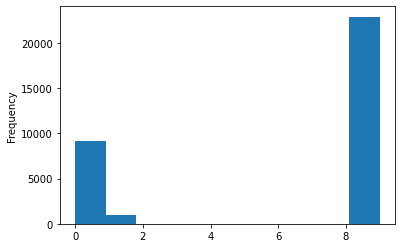

<IPython.core.display.Javascript object>

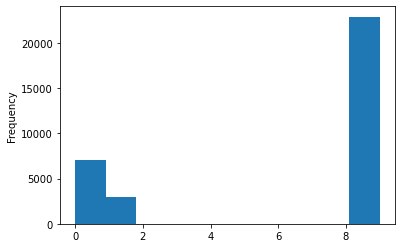

<IPython.core.display.Javascript object>

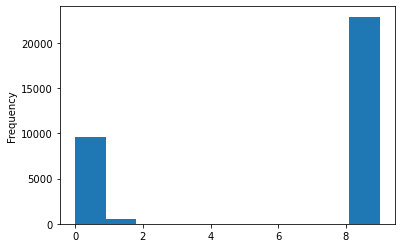

<IPython.core.display.Javascript object>

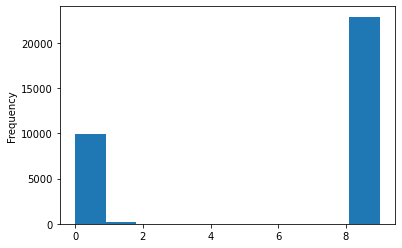

<IPython.core.display.Javascript object>

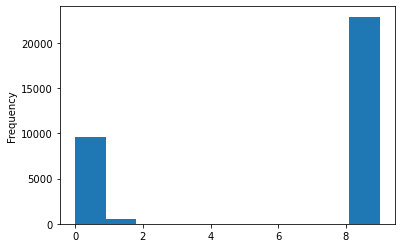

<IPython.core.display.Javascript object>

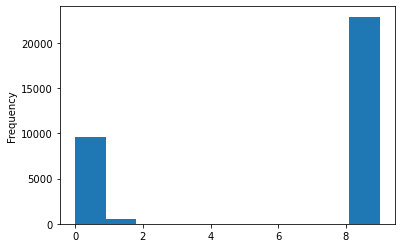

<IPython.core.display.Javascript object>

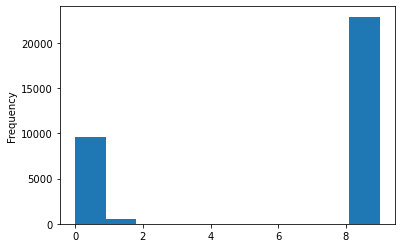

<IPython.core.display.Javascript object>

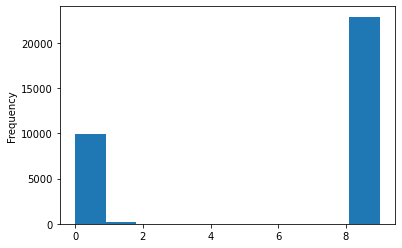

<IPython.core.display.Javascript object>

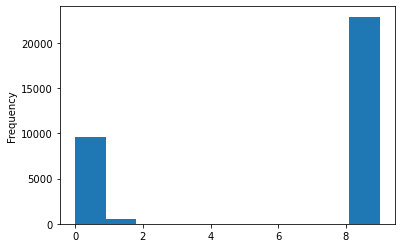

In [9]:
for column in df.columns[3:40]:
  df[column].plot(kind='hist')
  plt.show()

In [10]:
#Deleting all values of 9

df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai
32959,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai
32960,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai
32961,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai


In [11]:
df_city = df.drop(['Area',	'Location'] ,axis = 1)

In [12]:
df_city

,Price,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,4,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,2,0,0,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,2,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,3,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,14500000,2,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai
32959,14500000,1,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai
32960,4100000,1,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai
32961,2750000,2,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Mumbai


In [13]:
df_cleaned = df.drop(['Area',	'Location','City'] ,axis = 1)

In [14]:
data = df_cleaned[df_cleaned.applymap(lambda x: x != 9).all(axis=1)]

In [15]:
data2 = df_city[df_city.applymap(lambda x: x != 9).all(axis=1)]

In [16]:
data2

,Price,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,4,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,2,0,0,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,2,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,3,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,62000000,3,0,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,Mumbai
26638,2500000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mumbai
26639,19000000,3,1,0,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Mumbai
26640,14900000,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mumbai


In [17]:
# column_means = df_cleaned.mode().iloc[0]

# # Replace all occurrences of '9' with the mean value in each column
# second_highest_modes = df_cleaned.apply(lambda col: col.value_counts().index[1] if 9 in col.values else None)

# # Replace '9' with the 2nd highest repeating value in each column
# data = df_cleaned.replace(9, second_highest_modes)

In [18]:
data

,Price,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,4,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,2,0,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,2,0,0,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,8358000,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,3,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,62000000,3,0,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,0,0,0
26638,2500000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26639,19000000,3,1,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
26640,14900000,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
data[data["MaintenanceStaff"] == 9]

,Price,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City', ylabel='Price'>

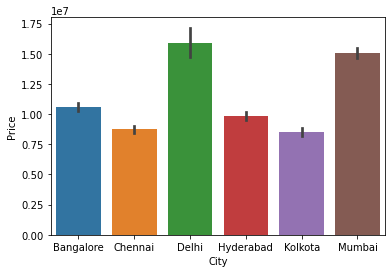

In [20]:
sns.barplot(x=df['City'], y=df['Price'])
#Prices of house in Delhi are the highest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

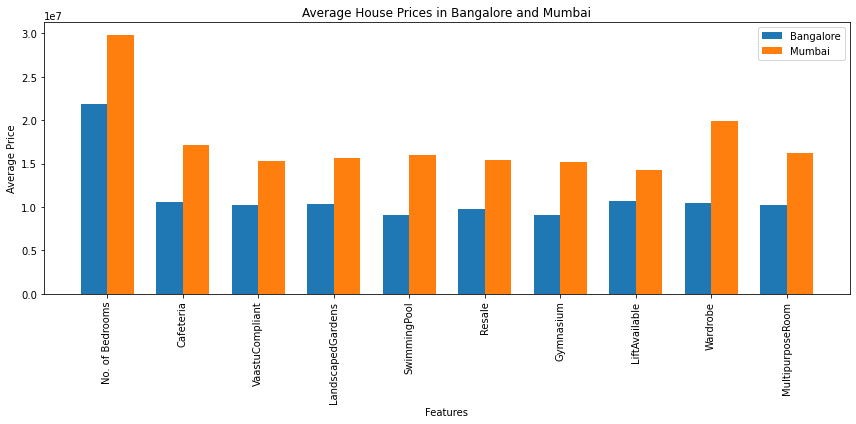

In [23]:
features = ['No. of Bedrooms', 'Cafeteria', 'VaastuCompliant', 'LandscapedGardens', 
            'SwimmingPool', 'Resale', 'Gymnasium', 'LiftAvailable', 'Wardrobe', 'MultipurposeRoom']

# Calculate the average price for each feature in Bangalore and Mumbai
bangalore_avg_price = []
mumbai_avg_price = []
for feature in features:
    bangalore_avg_price.append(df1.groupby(feature)['Price'].mean().mean())
    mumbai_avg_price.append(df6.groupby(feature)['Price'].mean().mean())

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(features))
plt.bar([i - bar_width/2 for i in x], bangalore_avg_price, bar_width, label='Bangalore')
plt.bar([i + bar_width/2 for i in x], mumbai_avg_price, bar_width, label='Mumbai')
plt.xticks(x, features, rotation=90)
plt.title('Average House Prices in Bangalore and Mumbai')
plt.xlabel('Features')
plt.ylabel('Average Price')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
top_locations = df['Location'].value_counts().head(10).index #top 10 property locations by count of occ
     

In [25]:
df_top_locations = df[df['Location'].isin(top_locations)]
     

In [26]:
data.shape

(10093, 38)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

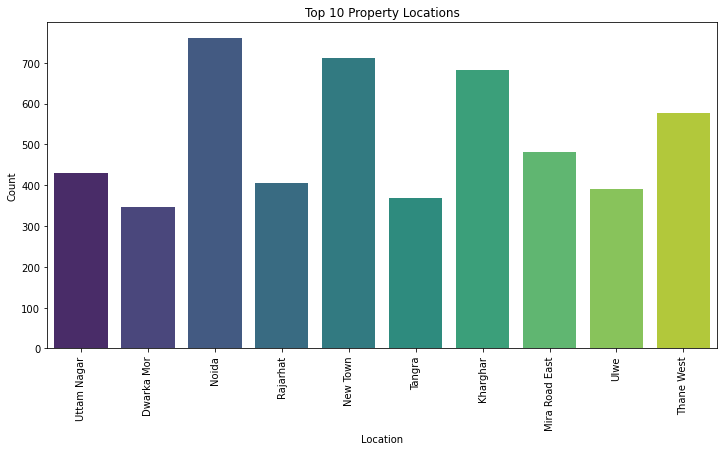

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_locations, x='Location', palette='viridis')
plt.title('Top 10 Property Locations')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()
#noida being the highest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

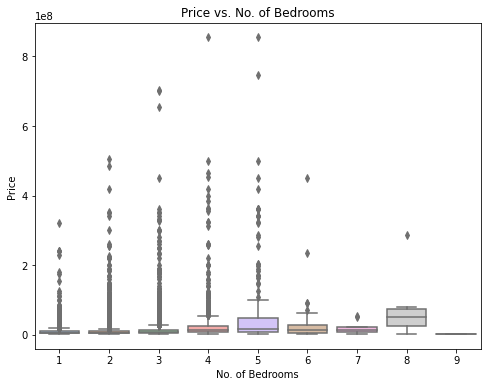

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='No. of Bedrooms', y='Price', palette='pastel')
plt.title('Price vs. No. of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.show()
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

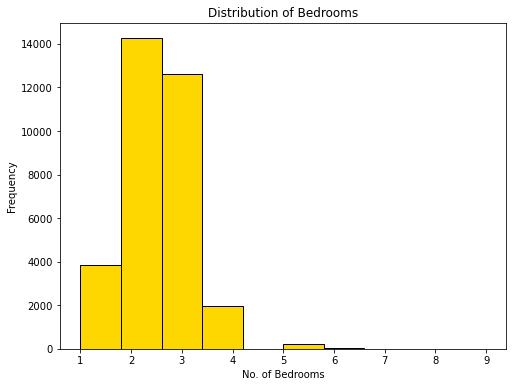

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df['No. of Bedrooms'], bins=10, color='gold', edgecolor='black')
plt.title('Distribution of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.show()
# most frequent is 2 bedroom house

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

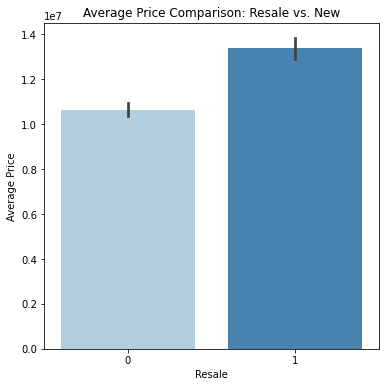

In [30]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Resale', y='Price', palette='Blues')
plt.title('Average Price Comparison: Resale vs. New')
plt.xlabel('Resale')
plt.ylabel('Average Price')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                Feature  Importance
0       No. of Bedrooms    0.341256
19            Cafeteria    0.073327
29      VaastuCompliant    0.055203
5     LandscapedGardens    0.043338
4          SwimmingPool    0.039516
1                Resale    0.035678
3             Gymnasium    0.028383
27        LiftAvailable    0.027170
35             Wardrobe    0.024692
20     MultipurposeRoom    0.022766
6          JoggingTrack    0.022208
7   RainWaterHarvesting    0.020215
8           IndoorGames    0.019966
23        Gasconnection    0.017917
11       SportsFacility    0.017815
10             Intercom    0.017282
17           CarParking    0.016315
26   Children'splayarea    0.015586
16          PowerBackup    0.015486
15         24X7Security    0.015016
2      MaintenanceStaff    0.012912
24                   AC    0.012490
13            ClubHouse    0.011678
28                  BED    0.010886
31           GolfCourse    0.010577
36         Refrigerator    0.010310
18         StaffQuarter    0

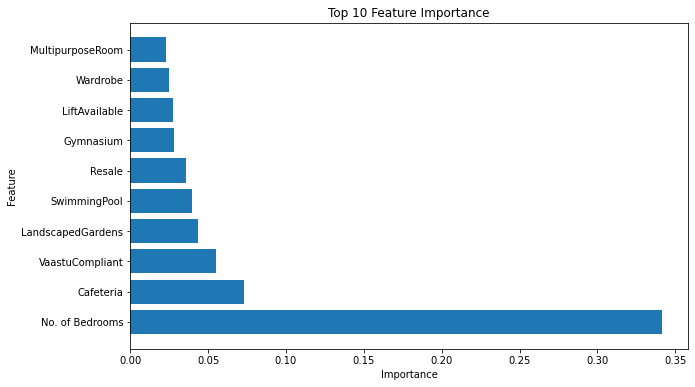

In [31]:
# Calculating important features and eliminating rest

X = data.drop('Price', axis=1)
y = data['Price']


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()

In [32]:
first_10_features = feature_importance_df['Feature'].head(10).tolist()
print(first_10_features)
     

['No. of Bedrooms', 'Cafeteria', 'VaastuCompliant', 'LandscapedGardens', 'SwimmingPool', 'Resale', 'Gymnasium', 'LiftAvailable', 'Wardrobe', 'MultipurposeRoom']


In [33]:
#Important 10 features are considered here

features = ['No. of Bedrooms', 'Cafeteria', 'VaastuCompliant', 'LandscapedGardens', 'SwimmingPool', 'Resale', 'Gymnasium', 'LiftAvailable', 'Wardrobe', 'MultipurposeRoom', 'Price']
final_df = data[features]
final_df
     

,No. of Bedrooms,Cafeteria,VaastuCompliant,LandscapedGardens,SwimmingPool,Resale,Gymnasium,LiftAvailable,Wardrobe,MultipurposeRoom,Price
0,4,0,0,1,1,0,1,1,0,0,30000000
1,2,0,1,1,1,0,1,1,0,1,7888000
2,2,0,0,1,1,0,1,1,0,0,4866000
3,3,0,0,0,0,0,0,1,0,0,8358000
4,3,0,0,1,1,0,1,1,0,1,6845000
...,...,...,...,...,...,...,...,...,...,...,...
26637,3,0,1,1,1,0,1,1,0,1,62000000
26638,1,0,0,0,0,0,0,0,0,0,2500000
26639,3,0,1,1,1,1,1,1,0,1,19000000
26640,2,0,0,0,0,0,0,1,0,0,14900000


<IPython.core.display.Javascript object>

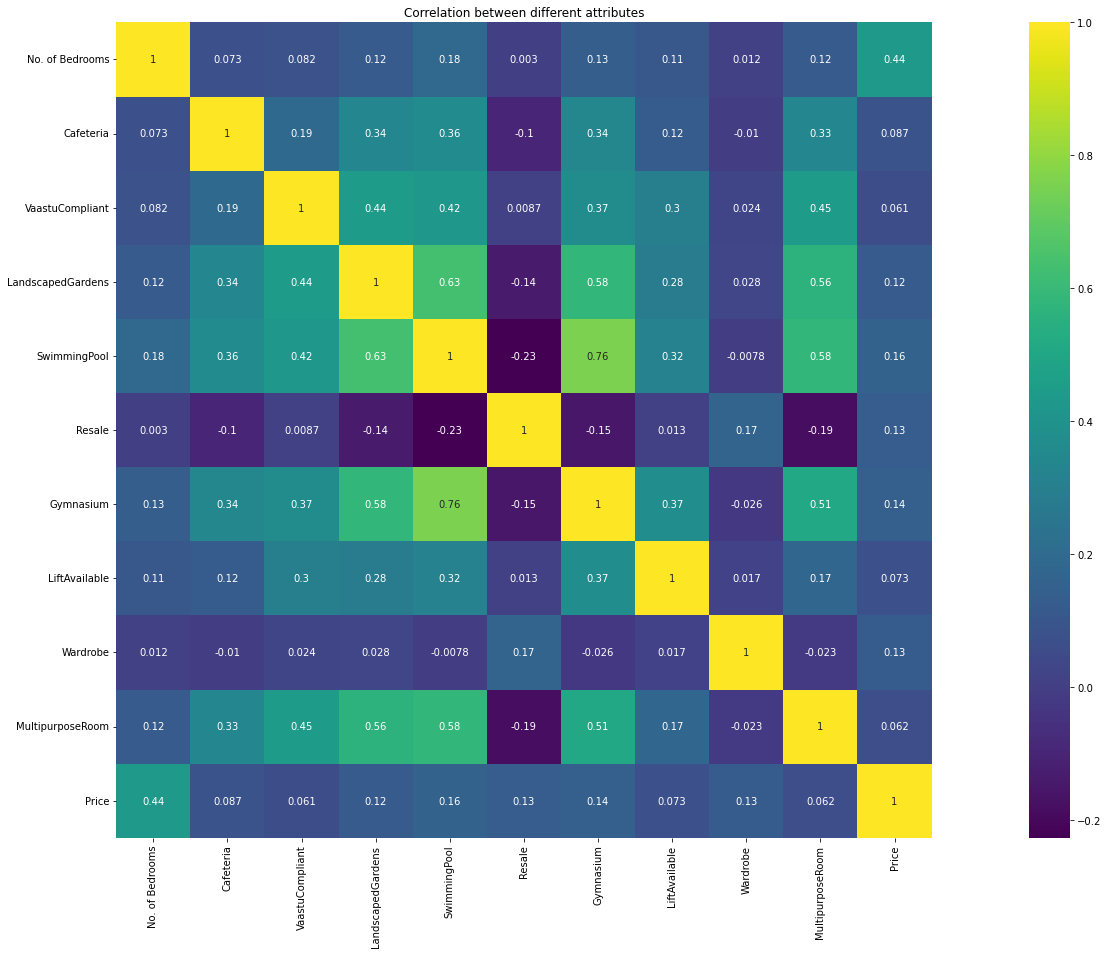

In [34]:
# Correlation between variables

plt.figure(figsize = (35,15))
sns.heatmap(final_df.corr(),vmax = 1 ,square = True,annot = True,cmap = 'viridis')
plt.title("Correlation between different attributes")
plt.show()
     

In [35]:
for i , r in final_df.corr().iterrows():
    print(i)
    print(r)
     

No. of Bedrooms
No. of Bedrooms      1.000000
Cafeteria            0.072895
VaastuCompliant      0.081532
LandscapedGardens    0.121685
SwimmingPool         0.181079
Resale               0.003044
Gymnasium            0.133460
LiftAvailable        0.105624
Wardrobe             0.011868
MultipurposeRoom     0.118662
Price                0.439123
Name: No. of Bedrooms, dtype: float64
Cafeteria
No. of Bedrooms      0.072895
Cafeteria            1.000000
VaastuCompliant      0.186518
LandscapedGardens    0.335758
SwimmingPool         0.358673
Resale              -0.100546
Gymnasium            0.340135
LiftAvailable        0.124469
Wardrobe            -0.010145
MultipurposeRoom     0.334372
Price                0.087466
Name: Cafeteria, dtype: float64
VaastuCompliant
No. of Bedrooms      0.081532
Cafeteria            0.186518
VaastuCompliant      1.000000
LandscapedGardens    0.444660
SwimmingPool         0.424854
Resale               0.008700
Gymnasium            0.366469
LiftAvailable     

In [36]:
corr_features = []

for i , r in final_df.corr().iterrows():
    k = 0 # counter
    for j in range(len(r)):
        if i != r.index[k]:
            if r.values[k] >= 0.5:
                corr_features.append([i,r.index[k], r.values[k]])
        k += 1
corr_features
feat = []
for i in corr_features:
    if i[2] >= 0.8:

        feat.append(i[0])
        feat.append(i[1])

final_df.drop(list(set(feat)) , axis = 1 , inplace = True)

D:\Users\VISHNU\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
# Model Building

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
X = final_df.drop('Price', axis=1)
y = final_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

<IPython.core.display.Javascript object>

In [38]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
linear_mse = mean_squared_error(y_test, linear_predictions)

print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))
print("Linear Regression MSE:", linear_mse)

0.2363948238579453
0.23161594906269256
Linear Regression MSE: 138295559410844.03


In [39]:
#Gradient Boost

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
gb_mse = mean_squared_error(y_test, gb_predictions)

print(gb_model.score(X_train,y_train))
print(gb_model.score(X_test,y_test))
print("Gradient Boosting MSE:", gb_mse)

<IPython.core.display.Javascript object>

0.606046526556856
0.3129111542931321
Gradient Boosting MSE: 123663858152796.58


In [40]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
dt_mse = mean_squared_error(y_test, dt_predictions)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))
print("Decision Tree MSE:", dt_mse)


0.6825591011503398
0.2648011460694669
Decision Tree MSE: 132322810004329.64


In [41]:
# Randon Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))
print("Random Forest MSE:", rf_mse)

0.6776201921008601
0.2765961570352552
Random Forest MSE: 130199916331847.86


In [42]:
custom_values = [[2,	0,	1	,1,1,	0,1,	1	,0	,1]]

# Convert the custom input values to a NumPy array
custom_array = np.array(custom_values)
y_pred = rf_model.predict(custom_array)

# Print the predicted values
print("Predicted Values:", y_pred)

<IPython.core.display.Javascript object>

Predicted Values: [7104094.00005839]


In [47]:
# Hyper Parameter Testing 

from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
model=ensemble.RandomForestRegressor()
param_grid=[{'n_estimators':[20,30,40,60,100], 'max_depth':[5,10,15,20]
          },{'n_estimators':[20,30,40,60,100], 'max_depth':[5,10,15,20]
             ,'max_features':[2,5,8]}]

rnd_search = RandomizedSearchCV(model, param_grid, cv=10,
                                          return_train_score=True)
rnd_search.fit(X_train,y_train)
rnd_search.best_score_
     

0.5330223329876039

In [48]:
# model=ensemble.RandomForestRegressor()
# from sklearn.model_selection import GridSearchCV
# parameters=[{'n_estimators':[20,30,40,60,100], 'max_depth':
#              [5,10,15,20]},
#              {'n_estimators':[20,30,40,60,100], 'max_depth':
#              [5,10,15,20],'max_features':[2,5,8]}]

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            cv=10,
#                            n_jobs=-1)

# grid = grid_search.fit(X_train,y_train)
# grid.best_score_

In [49]:
# grid.best_params_

In [50]:
from sklearn.ensemble import RandomForestRegressor
dt_model1 = RandomForestRegressor(n_estimators=100, max_depth=10)

# Train the model
dt_model1.fit(X_train, y_train)

# Make predictions
dt1_predictions = dt_model1.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
dt_mse1 = mean_squared_error(y_test, dt1_predictions)
print(dt_model1.score(X_train,y_train))
print(dt_model1.score(X_test,y_test))
     

0.6765666481139889
0.28315161424633895


In [51]:
custom_values = [[2,	0,	1	,1,1,	0,1,	1	,0	,1]]

# Convert the custom input values to a NumPy array
custom_array = np.array(custom_values)
y_pred = dt_model1.predict(custom_array)

# Print the predicted values
print("Predicted Values:", y_pred)
     

<IPython.core.display.Javascript object>

Predicted Values: [7340940.87516259]


In [52]:
# Bangalore City

bangalore_data = data2[data2['City']=='Bangalore']
bangalore_data

,Price,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,4,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,2,0,0,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,2,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,3,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,8306999,2,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,Bangalore
1947,4883000,1,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,Bangalore
1948,11500000,3,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,Bangalore
1949,8378000,2,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,Bangalore


In [53]:
features = ['No. of Bedrooms', 'Cafeteria', 'VaastuCompliant', 'LandscapedGardens', 'SwimmingPool', 'Resale', 'Gymnasium', 'LiftAvailable', 'Wardrobe', 'MultipurposeRoom', 'Price']
final_df = bangalore_data[features]
final_df

,No. of Bedrooms,Cafeteria,VaastuCompliant,LandscapedGardens,SwimmingPool,Resale,Gymnasium,LiftAvailable,Wardrobe,MultipurposeRoom,Price
0,4,0,0,1,1,0,1,1,0,0,30000000
1,2,0,1,1,1,0,1,1,0,1,7888000
2,2,0,0,1,1,0,1,1,0,0,4866000
3,3,0,0,0,0,0,0,1,0,0,8358000
4,3,0,0,1,1,0,1,1,0,1,6845000
...,...,...,...,...,...,...,...,...,...,...,...
1946,2,1,0,1,1,0,1,1,0,0,8306999
1947,1,1,0,1,1,0,1,1,0,0,4883000
1948,3,1,0,1,1,0,1,1,0,0,11500000
1949,2,1,0,1,1,0,1,1,0,0,8378000


In [54]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
X = final_df.drop('Price', axis=1)
y = final_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
bgb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
bgb_model.fit(X_train, y_train)

# Make predictions
bgb_predictions = bgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
bgb_mse = mean_squared_error(y_test, bgb_predictions)

print(bgb_model.score(X_train,y_train))
print(bgb_model.score(X_test,y_test))
print("Gradient Boosting MSE:", bgb_mse)

<IPython.core.display.Javascript object>

0.776867068170821
0.7475069554838425
Gradient Boosting MSE: 48847748351039.94


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
brf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
brf_model.fit(X_train, y_train)

# Make predictions
brf_predictions = brf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
brf_mse = mean_squared_error(y_test, brf_predictions)

print(brf_model.score(X_train, y_train))
print(brf_model.score(X_test, y_test))
print("Random Forest MSE:", brf_mse)

0.8104834762465312
0.7624424229402504
Random Forest MSE: 45958306555865.75


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Initialize the Decision Tree Regressor
bdt_model = DecisionTreeRegressor(random_state=42)

# Train the model
bdt_model.fit(X_train, y_train)

# Make predictions
bdt_predictions = bdt_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
bdt_mse = mean_squared_error(y_test, bdt_predictions)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))
print("Decision Tree MSE:", bdt_mse)


0.7706365735724414
0.7496355832017083
Decision Tree MSE: 43999716382643.05


In [58]:
#Mumbai City

Mumbai_data = data2[data2['City']=='Mumbai']
features = ['No. of Bedrooms', 'Cafeteria', 'VaastuCompliant', 'LandscapedGardens', 'SwimmingPool', 'Resale', 'Gymnasium', 'LiftAvailable', 'Wardrobe', 'MultipurposeRoom', 'Price']
final_df = Mumbai_data[features]

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
X = final_df.drop('Price', axis=1)
y = final_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [59]:
mgb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
mgb_model.fit(X_train, y_train)

# Make predictions
mgb_predictions = mgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
mgb_mse = mean_squared_error(y_test, mgb_predictions)

print(mgb_model.score(X_train,y_train))
print(mgb_model.score(X_test,y_test))

<IPython.core.display.Javascript object>

0.7927966597434114
0.8464881170592835


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Initialize the Decision Tree Regressor
mdt_model = DecisionTreeRegressor(random_state=42)

# Train the model
mdt_model.fit(X_train, y_train)

# Make predictions
mdt_predictions = mdt_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
mdt_mse = mean_squared_error(y_test,mdt_predictions)
print(mdt_model.score(X_train,y_train))
print(mdt_model.score(X_test,y_test))

0.8808203138191314
0.8240524124735633
